In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from zipfile import ZipFile
import requests
import io
import math
import plotly.graph_objects as go
import os
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io
import pandas as pd


In [104]:

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
response = requests.get(url)
data = pd.read_csv(url, header=None)
numerical_features = [
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave points_mean",
    "symmetry_mean",
    "fractal_dimension_mean",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave points_se",
    "symmetry_se",
    "fractal_dimension_se",
    "radius_worst",
    "texture_worst",
    "perimeter_worst",
    "area_worst",
    "smoothness_worst",
    "compactness_worst",
    "concavity_worst",
    "concave points_worst",
    "symmetry_worst",
    "fractal_dimension_worst",
]
data.columns = ["ID", "Diagnosis"] + numerical_features

Data exploration

In [105]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [106]:
print(data.head())

         ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

Data exploration and plots

In [107]:
continuous_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print("Continuous Features:")
print(continuous_features)

print("Categorical Features:")
print(categorical_features)

Continuous Features:
['ID', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Categorical Features:
['Diagnosis']


In [108]:
# Define the calculate function
def calculate(numeric_vector):
    return {
        "Count": numeric_vector.count(),
        "Miss.": numeric_vector.isna().sum(),
        "Card.": numeric_vector.nunique(),
        "Min": numeric_vector.min(),
        "Q1": numeric_vector.quantile(0.25),
        "Mean": numeric_vector.mean(),
        "Median": numeric_vector.median(),
        "Q3": numeric_vector.quantile(0.75),
        "Max": numeric_vector.max(),
        "SD": numeric_vector.std()
    }

def Plan(df, features):
    numeric_df = df[features] 
    data_quality_plan = pd.DataFrame(columns=["Feature", "Count", "Miss.", "Card.", "Min", "Q1", "Mean", "Median", "Q3", "Max", "SD"])
    for col in numeric_df:
        stats = calculate(numeric_df[col])
        stats["Feature"] = col
        data_quality_plan = pd.concat([data_quality_plan, pd.DataFrame([stats])], ignore_index=True)
    return data_quality_plan


data_quality_plan1 = Plan(data, continuous_features)
data_quality_plan1.loc[:, "Count":"SD"] = data_quality_plan1.loc[:, "Count":"SD"].round(1)

#data_quality_plan1

# Plot the DataFrame
fig = go.Figure(data=[go.Table(
    header=dict(values=list(data_quality_plan1.columns),
                fill_color='#61222D',
                align='left',
                font=dict(color='white')),
    cells=dict(values=[data_quality_plan1[column] for column in data_quality_plan1.columns],
               fill_color='lavender',
               align='left'))])
fig.update_layout(width=1500, height=600)  # Adjust the size of the figure
fig.show()
data_quality_plan1.to_csv("tables/data_quality_plan1.csv", index=False)

C:\Users\tiaan\AppData\Local\Temp\ipykernel_1744\74738848.py:22: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



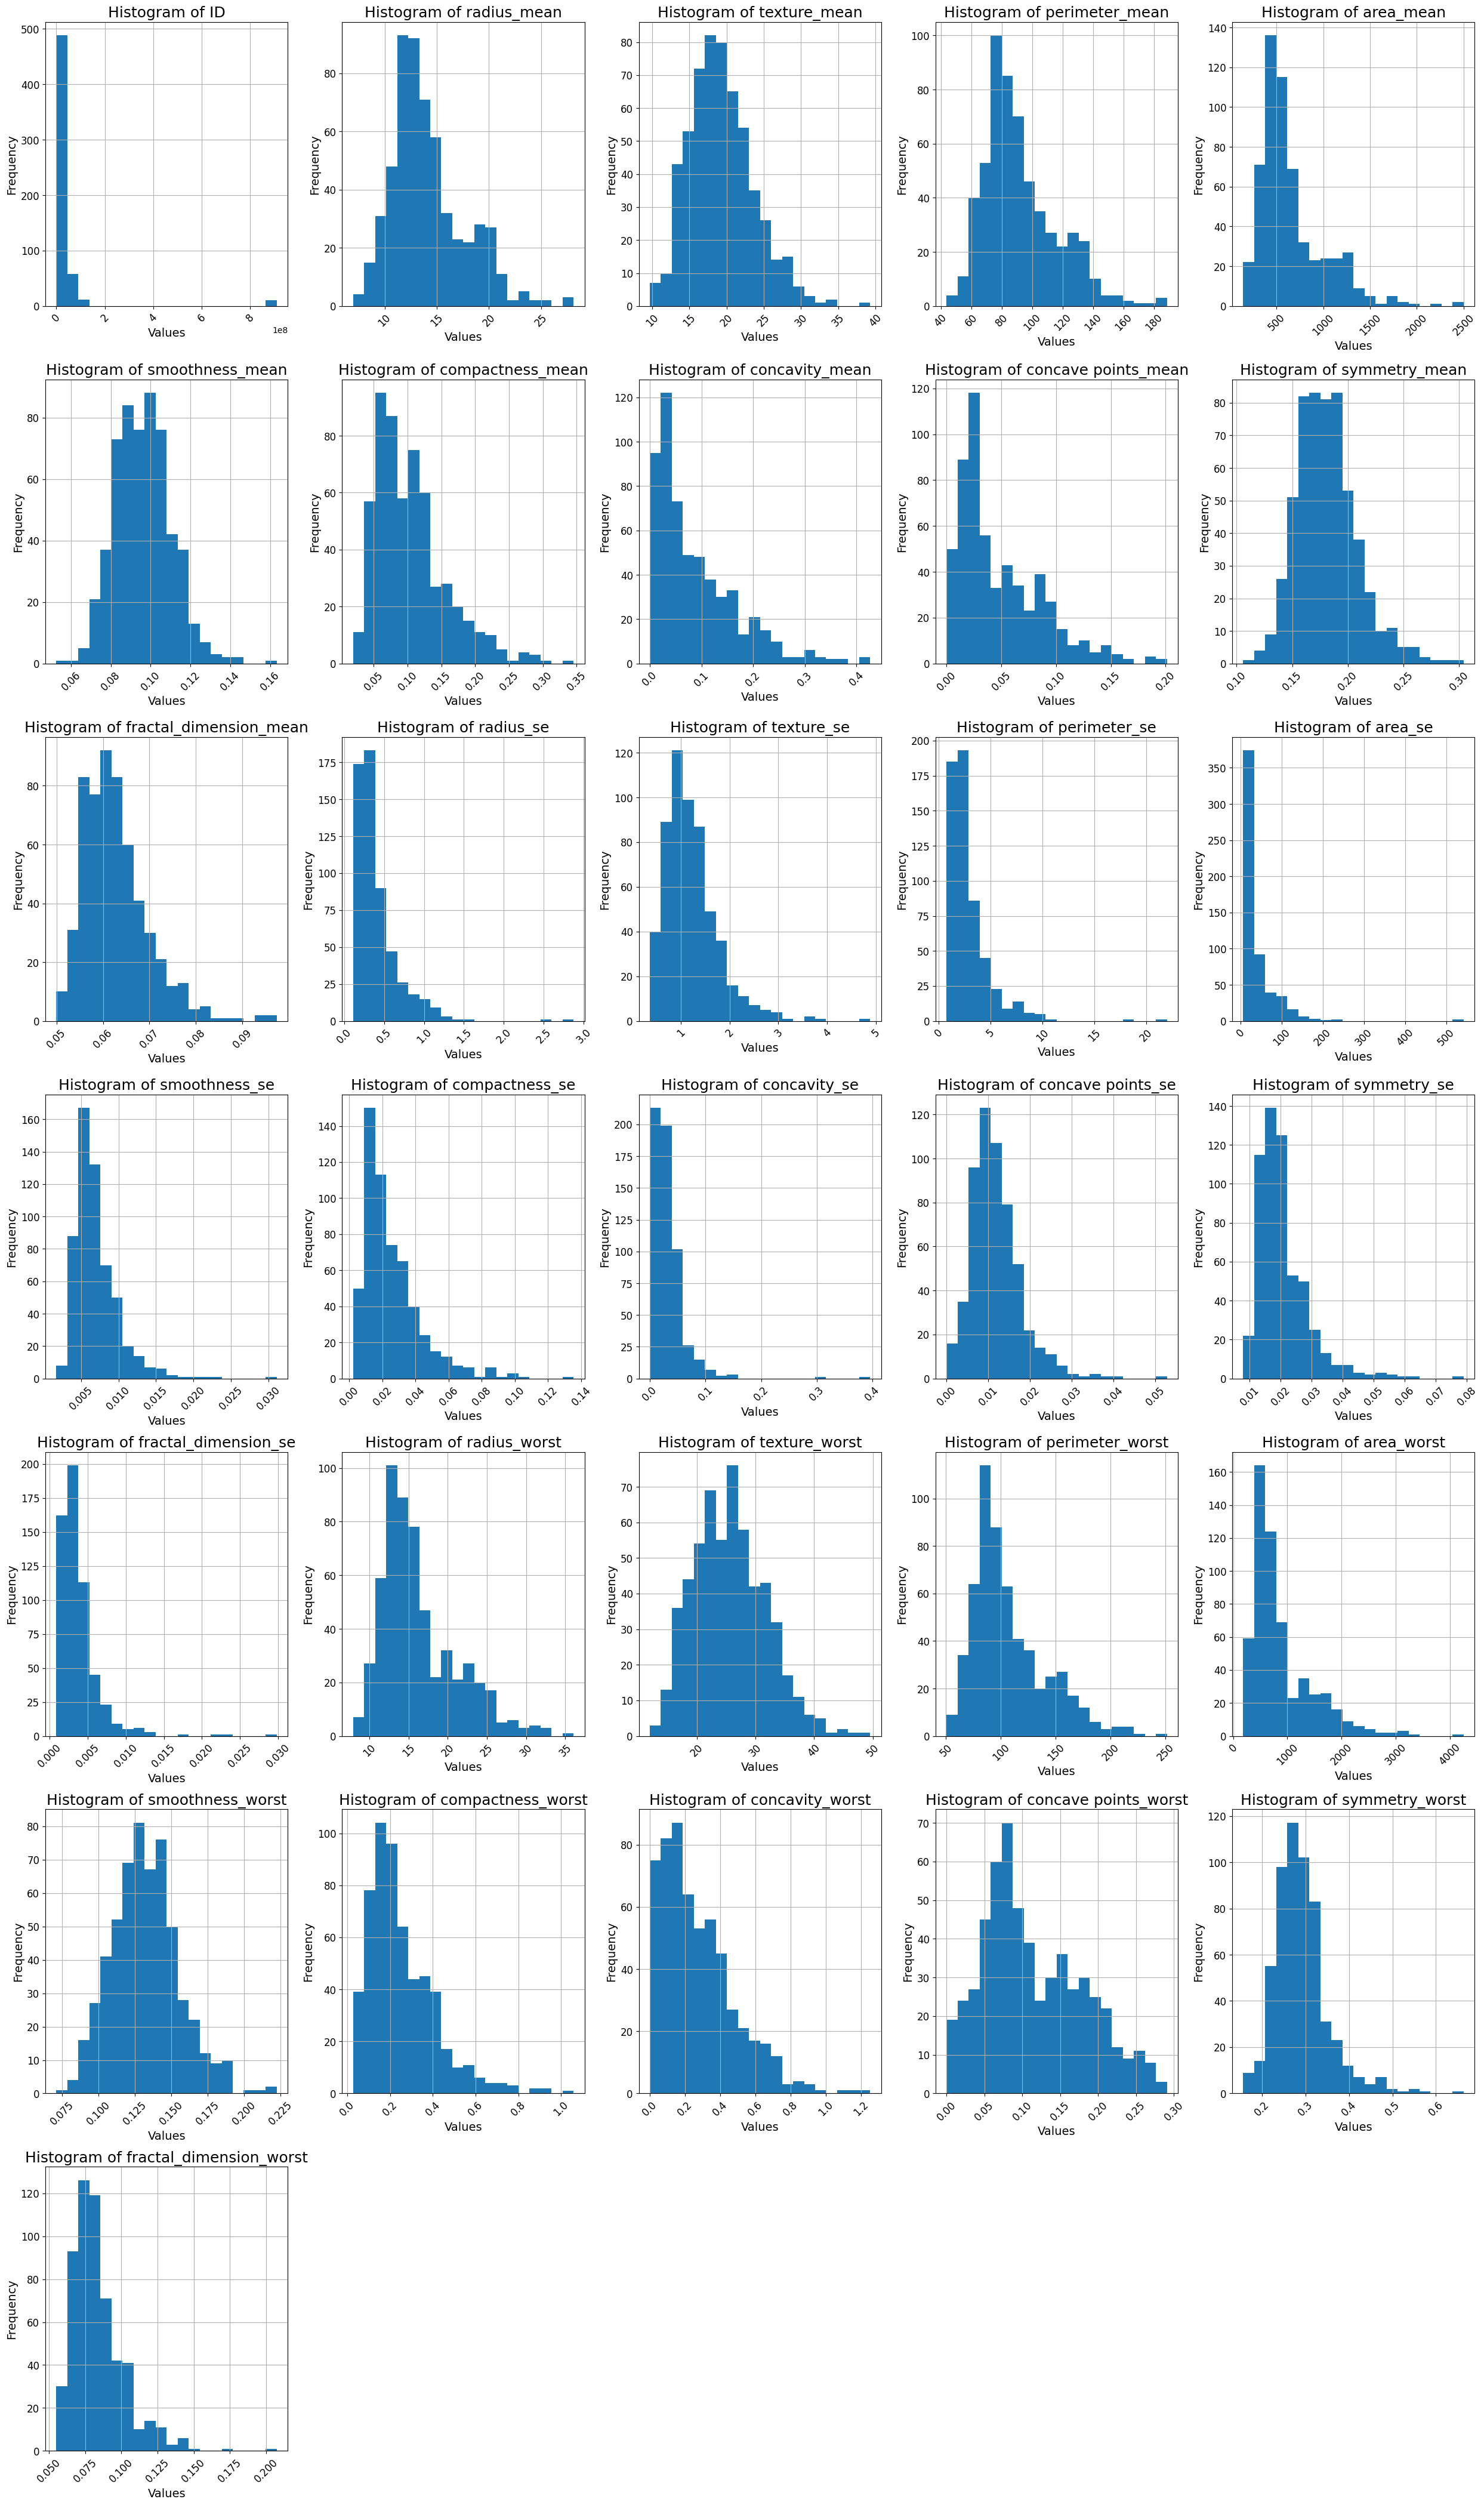

In [109]:
# Determine the number of rows and columns for the subplot grid
n = len(continuous_features)
ncols = 5
nrows = math.ceil(n / ncols)

# Create the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 6*nrows))

# Flatten the axes array
axes = axes.flatten()

# Plot histograms for each continuous feature
for i, feature in enumerate(continuous_features):
    data[feature].hist(bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}', fontsize=18)
    axes[i].set_xlabel('Values', fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

# Remove unused subplots
if n < nrows * ncols:
    for i in range(n, nrows * ncols):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [110]:
# Define the calculate function for categorical features
def calculate_categorical(vector):
    stats = {
        "Count": vector.count(),
        "Miss.": vector.isna().sum(),
        "Card.": vector.nunique()
    }
    
    # Calculate mode and related statistics
    mode_data = vector.mode()
    if len(mode_data) > 0:
        mode_val = mode_data[0]
        mode_count = vector.value_counts().iloc[0]
        stats["Mode"] = mode_val
        stats["Mode Freq"] = mode_count
        stats["Mode %"] = (mode_count / stats["Count"]) * 100
    else:
        stats["Mode"] = np.nan
        stats["Mode Freq"] = np.nan
        stats["Mode %"] = np.nan
    
    # Calculate second mode and related statistics if possible
    if vector.value_counts().shape[0] > 1:
        second_mode_val = vector.value_counts().index[1]
        second_mode_count = vector.value_counts().iloc[1]
        stats["2nd Mode"] = second_mode_val
        stats["2nd Mode Freq"] = second_mode_count
        stats["2nd Mode %"] = (second_mode_count / stats["Count"]) * 100
    else:
        stats["2nd Mode"] = np.nan
        stats["2nd Mode Freq"] = np.nan
        stats["2nd Mode %"] = np.nan

    return stats

def Plan_categorical(df, features):
    categorical_df = df[features] 
    data_quality_plan = pd.DataFrame(columns=["Feature", "Count", "Miss.", "Card.", "Mode", "Mode Freq", "Mode %", "2nd Mode", "2nd Mode Freq", "2nd Mode %"])
    for col in categorical_df:
        stats = calculate_categorical(categorical_df[col])
        stats["Feature"] = col
        data_quality_plan = pd.concat([data_quality_plan, pd.DataFrame([stats])], ignore_index=True)
    return data_quality_plan

data_quality_plan2 = Plan_categorical(data, categorical_features)
data_quality_plan2.loc[:, ["Mode %", "2nd Mode %"]] = data_quality_plan2.loc[:, ["Mode %", "2nd Mode %"]].round(1)
data_quality_plan2.to_csv("tables/data_quality_plan2.csv", index=False)

#data_quality_plan2

# Plot the DataFrame
fig = go.Figure(data=[go.Table(
    header=dict(values=list(data_quality_plan2.columns),
                fill_color='#61222D',
                align='left',
                font=dict(color='white')),
    cells=dict(values=[data_quality_plan2[column] for column in data_quality_plan2.columns],
               fill_color='lavender',
               align='left'))])
fig.update_layout(width=1500, height=800)  # Adjust the size of the figure
fig.show()

C:\Users\tiaan\AppData\Local\Temp\ipykernel_1744\342783405.py:42: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



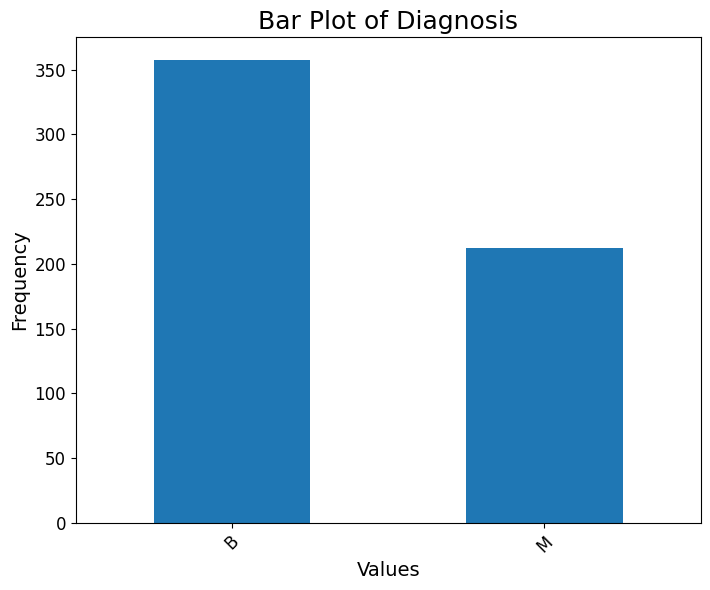

In [111]:
import math
import matplotlib.pyplot as plt

# Assuming categorical_features is defined somewhere in your code
# categorical_features = [...]

# Check if there are any categorical features
if categorical_features:
    n = len(categorical_features)
    ncols = 3  # Change the number of columns to 3
    nrows = math.ceil(n / ncols)

    # Create the subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 6*nrows))

    # Flatten the axes array
    axes = axes.flatten()

    # Plot bar plots for each categorical feature
    for i, feature in enumerate(categorical_features):
        data[feature].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Bar Plot of {feature}', fontsize=18)
        axes[i].set_xlabel('Values', fontsize=14)
        axes[i].set_ylabel('Frequency', fontsize=14)
        axes[i].tick_params(axis='x', rotation=45, labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)

    # Remove unused subplots
    if n < nrows * ncols:
        for i in range(n, nrows * ncols):
            fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()
else:
    print("No categorical features to plot.")

Data preprocessing

selecting features to use. Categorical features are not used for clustering. Only numerical will be used

### Remove Low Variance Features:

Removing low standard deviation features is based on the logic that these features exhibit little to no variability across the dataset, meaning they provide minimal information for distinguishing between data points. Features with very low variance are nearly constant and do not contribute meaningfully to the model's ability to identify patterns or make predictions. By excluding these features, you reduce noise, simplify the model, and improve computational efficiency without sacrificing performance. This helps in focusing on more informative features that can better capture the underlying structure of the data.

In [112]:
variances = data[continuous_features].var()
low_variance_features = variances[variances < 0.01].index.tolist()
filtered_continuous_features = [f for f in continuous_features if f not in low_variance_features]

print("Low Variance Features Removed:", low_variance_features)
print("Filtered Continuous Features:", filtered_continuous_features)


Low Variance Features Removed: ['smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Filtered Continuous Features: ['ID', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst']


### Correlation Analysis

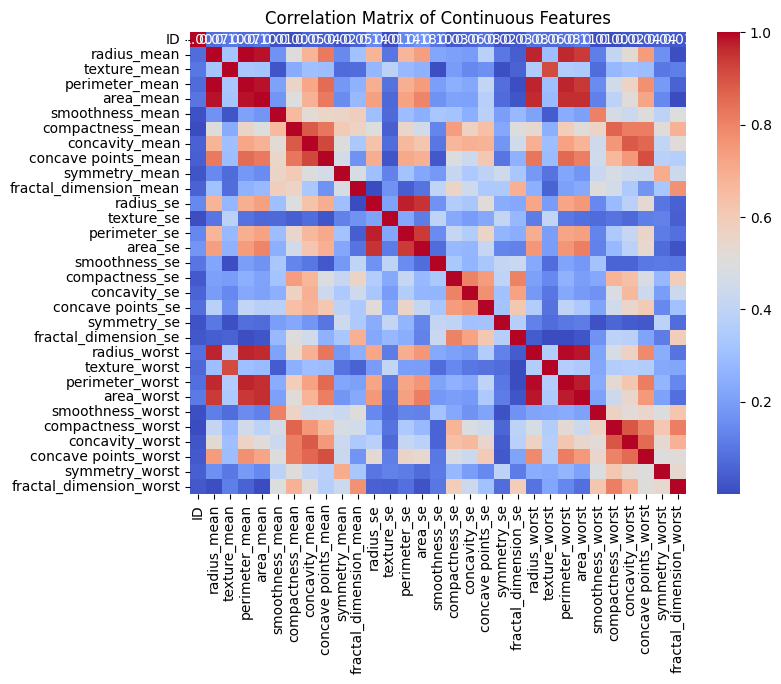

In [113]:
# Calculate correlation matrix
correlation_matrix = data[continuous_features].corr().abs()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Features')
plt.show()


In [114]:
correlation_matrix = data[filtered_continuous_features].corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Print the features that are being removed
print("Highly correlated features (correlation > 0.9):", highly_correlated_features)

filtered_continuous_features = [f for f in filtered_continuous_features if f not in highly_correlated_features]

# Print the features after removing high correlation
print("Features after removing high correlation:", filtered_continuous_features)

Highly correlated features (correlation > 0.9): ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst']
Features after removing high correlation: ['ID', 'radius_mean', 'texture_mean', 'radius_se', 'texture_se', 'compactness_worst', 'concavity_worst']


In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Remove 'ID' from filtered_continuous_features
filtered_continuous_features = [f for f in filtered_continuous_features if f != 'ID']

# Encode the 'Diagnosis' feature
label_encoder = LabelEncoder()
data['Diagnosis'] = label_encoder.fit_transform(data['Diagnosis'])

X = data[filtered_continuous_features]
y = data['Diagnosis']

model = RandomForestRegressor()
model.fit(X, y)
importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': filtered_continuous_features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


             Feature  Importance
0        radius_mean    0.614832
5    concavity_worst    0.145619
4  compactness_worst    0.097350
1       texture_mean    0.064225
2          radius_se    0.056441
3         texture_se    0.021533


In [116]:
from sklearn.preprocessing import StandardScaler

# Define the numerical features to include
numerical_features = [
    'radius_mean', 
    'concavity_worst', 
    'compactness_worst', 
    'texture_mean', 
    'radius_se', 
    'texture_se'
]

# Select the specified numerical features and drop 'ID' column
X = data[numerical_features]

# Check if 'ID' column exists before and after dropping it
if 'ID' in data.columns:
    print("'ID' column exists in the original data.")
else:
    print("'ID' column does not exist in the original data.")

if 'ID' not in X.columns:
    print("'ID' column was successfully deleted.")
else:
    print("'ID' column still exists in the data.")

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




'ID' column exists in the original data.
'ID' column was successfully deleted.


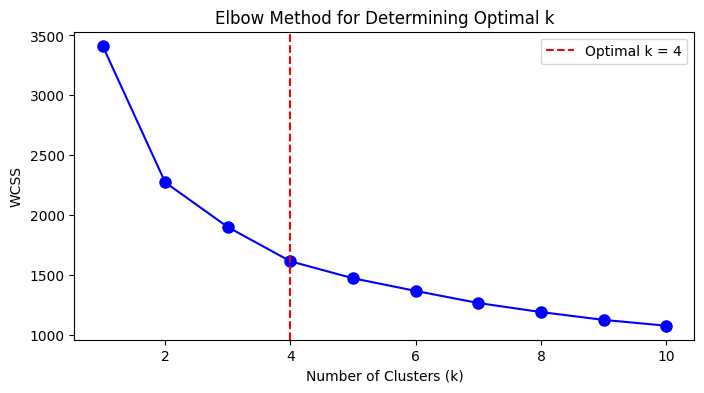

Optimal number of clusters: 4


In [117]:
import time
import numpy as np
import random
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import calinski_harabasz_score
from kneed import KneeLocator
import matplotlib.pyplot as plt



def determine_optimal_clusters(X, max_k=10):
    """
    Determine the optimal number of clusters using the elbow method.

    Args:
        X (np.ndarray): The dataset, where rows are samples and columns are features.
        max_k (int): The maximum number of clusters to consider.

    Returns:
        int: The optimal number of clusters.
    """
    wcss = []
    for i in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    knee_locator = KneeLocator(
        range(1, max_k + 1), wcss, curve="convex", direction="decreasing"
    )
    elbow_point = knee_locator.knee

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_k + 1), wcss, 'bo-', markersize=8)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method for Determining Optimal k')
    plt.axvline(elbow_point, linestyle='--', color='r', label=f'Optimal k = {elbow_point}')
    plt.legend()
    plt.show()

    if elbow_point is None:
        raise ValueError("KneeLocator could not find an optimal number of clusters.")
    
    return elbow_point


# Determine optimal number of clusters
optimal_clusters = determine_optimal_clusters(X_scaled, max_k=10)
print(f"Optimal number of clusters: {optimal_clusters}")



In [118]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform, cdist
import numpy as np

# K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, n_init=100, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_wcss = kmeans.inertia_



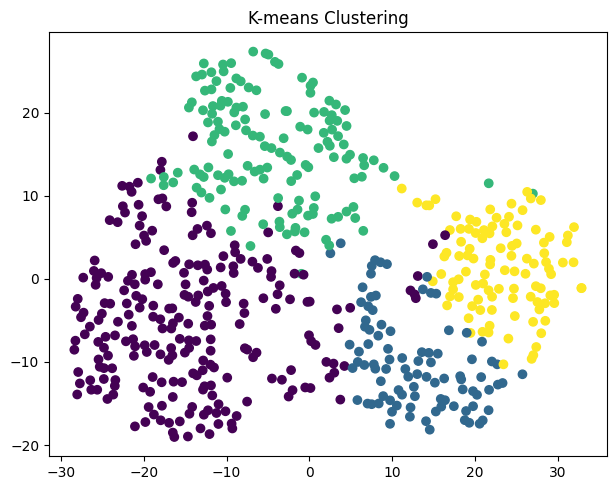

In [119]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')

plt.tight_layout()
plt.show()